## 데이터 불러오기
 - 각 tutor의 클래스별 학생들의 점수를 나열한 것
 - A(N=15) & B(N=18)

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


## 데이터 요약
- 각 클래스 학생들의 데이터 분포 요약
- groupby : 평균, 표준편차, 몇명

In [3]:
df.groupby('tutor')['grade'].agg(['mean', 'std', 'count']).reset_index()

,tutor,mean,std,count
0,Anastasia,74.533333,8.998942,15
1,Bernadette,69.055556,5.774918,18


im

Text(0.5, 1.0, 'Bernadette')

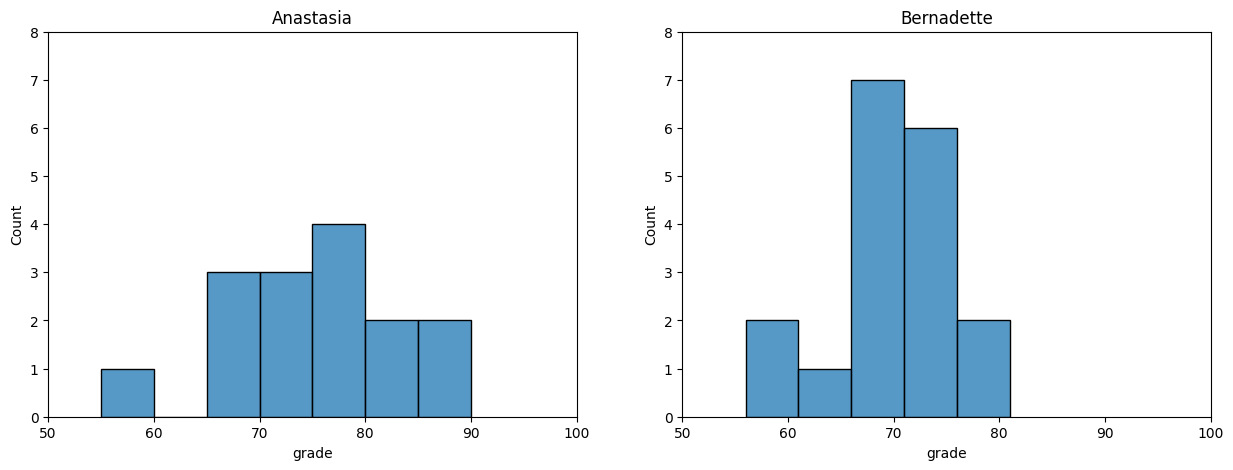

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia'] ['grade'])
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette'] ['grade'])
sns.histplot(Anastasia['grade'], ax = axes[0], binwidth = 5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth = 5)

axes[0].set_xlim(50,100) # x축 설정
axes[1].set_xlim(50,100) # x축 설정

axes[0].set_ylim(0,8) # y축 설정
axes[1].set_ylim(0,8) # y축 설정

axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

### pointplot()
- 두그릅의 학생에 대한 평균과 해당 신뢰구간을 보여준다.

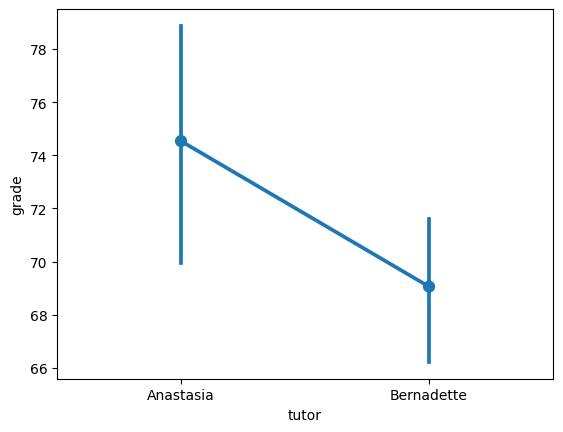

In [10]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [11]:
!pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=9eaec391a668833f94ceb8f439f7a073e7ca196b6bbbdfd2a80bd8f52ebf2b80
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


## 독립표본 T-검정
- 절차 1 : 정규성 검정
- 절차 2 : 등분산성
- 절차 3 : T-test

In [15]:
import pingouin as pg

# 정규성 검정 >>> 각 tutor 는 pvalue 를 근거로 정규성을 만족한다.
pg.normality(df, dv="grade", group='tutor')

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


In [14]:
# 등분산성 검정
pg.homoscedasticity(data = df, dv = 'grade', group='tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


In [16]:
# T-test
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 문제
1. 각 그룹에 대한 표본평균을 구한다.
2. 귀무가설, 대립가설을 설정
3. 정규성 검정, 등분산성 검정 코드를 작성 후 결과 해석
4. T-test 진행, t-통계량, p-value 값 구하기
5. 가설 검정의 결과를 귀무가설을 기준으로 채택/기각

(toothgrowth.csv)에는 기니피그 60마리의 치아 길이, 투여한 비타민 C 종류, 투여량이 저장되어 있다.  오렌지주스를 투여받은 기니피그의 치아 길이 평균이 아스코르브산을 투여받은 기니피그의 치아 길이 평균과 일치하는지 t-검정(Two Sample t-test)를 통해 답하고자 한다. 가설은 아래와 같다.

- 데이터의 변수
    + len : 치아의 길이
    + supp : 투여한 약제(VC: 아스코르브산, OJ: 오렌지주스)
    + does : 투여량

조건 : pingouin 라이브러리 사용하지 않고 !! scipy만 사용
---> 40분 까지 .ipybn 파일 제출 to Slack

In [21]:
df = pd.read_csv('./toothgrowth.csv')
df.head(1)

,len,supp,dose
0,4.2,VC,0.5


In [29]:
# supp 그룹에 대한 len = 치아길이 표본평균 구하기
std_group = df.groupby('supp')['len'].agg(['std']).reset_index()
std_group

# 귀무가설 : 투여한 약제 종류에 따른 치아길이가 유의미한 변화가 있다.
# 대립가설 : 투여한 약제 종류에 따른 치아길이가 유의미한 변화가 없다.

,supp,std
0,OJ,6.605561
1,VC,8.266029


In [35]:
import numpy as np
import scipy.stats as stats

# 정규성 검정
shapiro_test = stats.shapiro(std_group['std'])
print("Shapiro-Wilk Test (supp): p-value =", shapiro_test.pvalue)

ValueError: ignored

In [37]:
# 'OJ' 그룹 데이터의 정규성 검정
shapiro_test_OJ = stats.shapiro(df[df['supp'] == 'OJ']['len'])
print("Shapiro-Wilk Test (OJ group): p-value =", shapiro_test_OJ.pvalue)

# 'VC' 그룹 데이터의 정규성 검정
shapiro_test_VC = stats.shapiro(df[df['supp'] == 'VC']['len'])
print("Shapiro-Wilk Test (VC group): p-value =", shapiro_test_VC.pvalue)

Shapiro-Wilk Test (OJ group): p-value = 0.023587485775351524
Shapiro-Wilk Test (VC group): p-value = 0.4284436106681824


In [36]:
# 독립표본 t-test
t_statistic, p_value = stats.ttest_ind(df[df['supp'] == 'OJ']['len'], df[df['supp'] == 'VC']['len'])

# 검정 결과 출력
print("t-test: T-statistic =", t_statistic, "p-value =", p_value)

t-test: T-statistic = 1.91526826869527 p-value = 0.06039337122412849


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
DATA_PATH = '/content/drive'
df = pd.read_csv(DATA_PATH + '/My Drive/statistics/toothgrowth.csv')
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [48]:
df.groupby('supp')['len'].agg(['mean', 'std', 'count']).reset_index()

,supp,mean,std,count
0,OJ,20.663333,6.605561,30
1,VC,16.963333,8.266029,30


2. 귀무가설, 대립가설 설정
- 귀무가설 : 투여한 약제별(OJ, VC)의 평균 치아 길이는 같다.
- 대립가설 : 투여한 약제별(OJ, VC)의 평균 치아 길이는 같지 않다.

3. 정규성 검정, 등분산성 검정 코드를 작성하고, 결과 해석
 - 첫번째 질문 : 정규성 검정 해야할까요? 말아야 할까요
 ---> 결론 communication 문제

 - 두번째 질문 등분산성 검정


In [49]:
from scipy import stats
# 두 그룹간의 분산 차이가 없다.
stats.levene(df.loc[df['supp'] == 'VC', 'len'], df.loc[df['supp'] == 'OJ', 'len'])

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

- p.value = 0.27
- 귀무가설 : 두 그룹의 분산의 차이가 없다 ---> 분산의 동질성 만족

In [51]:
from scipy.stats import stats

t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == 'VC', 'len'],
                                   df.loc[df['supp'] == 'OJ', 'len'],
                                   equal_var=True)

<ipython-input-51-b6b7d8ab1b9b>:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == 'VC', 'len'],


In [52]:
# 두 그룹간의 평균 차이가 없다.
t_score, p_value

(-1.91526826869527, 0.06039337122412849)

- 두 그룹간에 평균 차이 없음 !
- 두 그룹간에 유의미하게 평균 차이가 있다고 보기 통계적으로 어려움

## 대응표본
- 체중 측정
- 식단 운동 프로그램
 + 편의점, 2000원 커피 음료(당류)

In [53]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [55]:
df.describe()

,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


###데이터 시각화

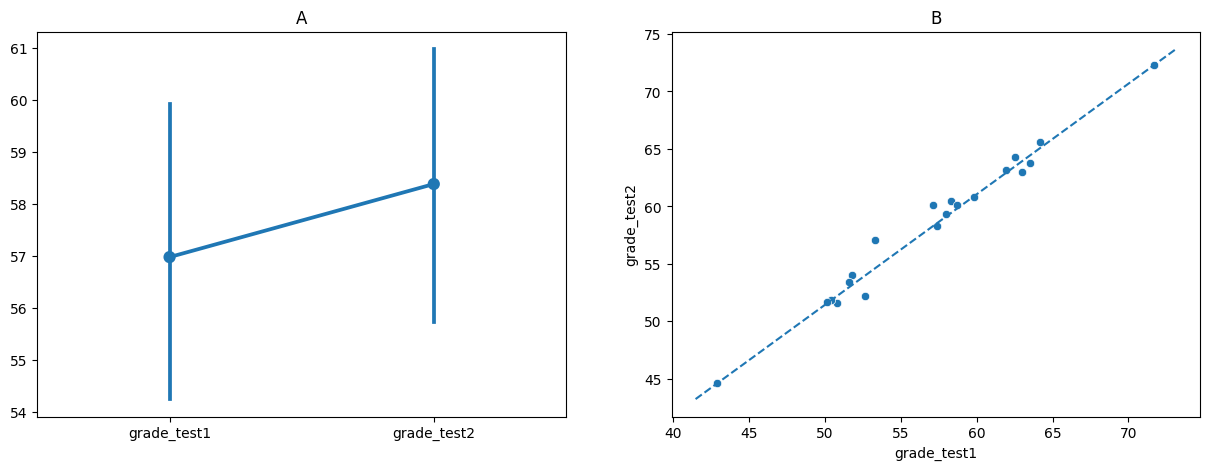

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(data = df, ax = ax[0])
sns.scatterplot(x = 'grade_test1', y = 'grade_test2', data = df, ax = ax[1])
ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls = '--')

ax[0].set_title("A")
ax[1].set_title("B")
plt.show()

### 데이터 가공
- 실험 전후 차이를 보기 위해

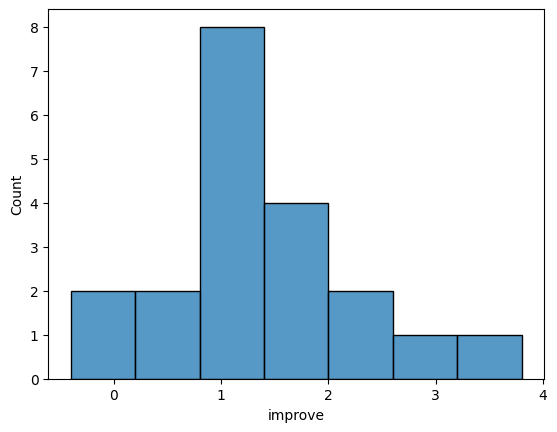

In [68]:
df2 = df.copy()
df2['improve'] = df2['grade_test2'] - df2['grade_test1']

sns.histplot(data = df2, x = 'improve')
plt.show()

In [69]:
## pingouin 라이브러리 활용해서 정규성 검정
pg.normality(df2['improve'])

,W,pval,normal
improve,0.966399,0.677769,True


In [70]:
from pingouin import ttest
ttest(df2['grade_test2'], df2['grade_test1'], paired = True) # 대응표본 검정을 하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446


## 문제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

In [73]:
from google.colab import drive

df = pd.read_csv('/content/drive/My Drive/statistics/insectsprays.csv')
df.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


In [75]:
df['diff'] = df['after_spr'] - df['before_spr']
df.head()
# 귀무가설 : 살충제는 곤충 제거에 유의미적인 효과가 있다.
# 대립가설 : 살충제는 곤충 제거에 유의미적인 효과가 없다.

,before_spr,after_spr,diff
0,10,0,-10
1,7,1,-6
2,20,7,-13
3,14,2,-12
4,14,3,-11


In [76]:
df.describe()

,before_spr,after_spr,diff
count,36.000000,36.000000,36.000000
mean,15.500000,3.500000,-12.000000
std,5.068108,2.348252,4.834401
min,7.000000,0.000000,-24.000000
25%,11.750000,2.000000,-13.250000
50%,14.500000,3.000000,-12.000000
75%,19.250000,5.000000,-9.000000
max,26.000000,12.000000,-4.000000


In [83]:
from scipy import stats

t_score, p_value = stats.ttest_rel(df['before_spr'], df['after_spr'])
print(round(t_score, 4), round(p_value, 2))

14.8933 0.0


In [85]:
from scipy.stats import shapiro
shapiro(df['diff'])

ShapiroResult(statistic=0.9238725900650024, pvalue=0.016382716596126556)

In [86]:
from scipy.stats import stats
t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])
print(t_score)
print(p_value)

-14.893263274163433
1.0227956957398466e-16


<ipython-input-86-f8ed12827bbe>:2: DeprecationWarning: Please use `ttest_rel` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])


In [91]:
if p_value >= 0.05:
  print("채택")
else:
  print("기각")

기각


<Axes: >

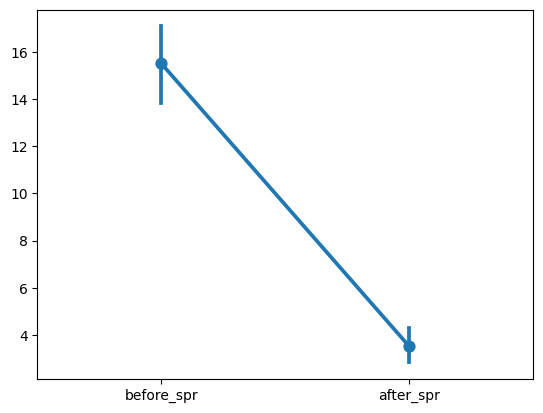

In [94]:
import seaborn as sns
sns.pointplot(data=df.loc[:, 'before_spr':'after_spr'])

In [98]:
shapiro(df)

ShapiroResult(statistic=0.9725798964500427, pvalue=0.02478092908859253)

In [100]:
shapiro(df['before_spr'])

ShapiroResult(statistic=0.9637261033058167, pvalue=0.2793274223804474)